# Pre Processing

In [0]:
import pandas as pd
df = pd.read_csv("Hotels_data_Changed.csv",parse_dates=[1,2])
df = df.drop(['Unnamed: 0','Snapshot ID','Days','Original Price','Available Rooms','Hotel Stars'], axis=1)
df.head()

,Snapshot Date,Checkin Date,Discount Price,Discount Code,Hotel Name,Day Diff,WeekDay,Discount Diff,Discount Perc
0,2015-07-17,2015-08-12,1040,1,Best Western Plus Seaport Inn Downtown,26,Wednesday,138,11.714771
1,2015-07-17,2015-08-19,982,1,Best Western Plus Seaport Inn Downtown,33,Wednesday,131,11.769991
2,2015-07-17,2015-08-13,4240,1,The Peninsula New York,27,Thursday,130,2.974828
3,2015-07-17,2015-07-26,1667,1,Eventi Hotel a Kimpton Hotel,9,Sunday,72,4.140311
4,2015-07-17,2015-08-12,1672,1,Eventi Hotel a Kimpton Hotel,26,Wednesday,67,3.852789


## Initial analysis

In [0]:
print('Data Shape - ' , df.shape, '\n')
print('Data Description : \n' , df.describe())

Data Shape -  (187848, 9) 

Data Description : 
        Discount Price  Discount Code       Day Diff  Discount Diff  \
count   187848.000000  187848.000000  187848.000000  187848.000000   
mean      1673.172283       2.434186      17.465685     152.569860   
std        983.618013       1.005191      10.040225     143.316985   
min        260.000000       1.000000       1.000000      15.000000   
25%       1035.000000       2.000000       9.000000      70.000000   
50%       1475.000000       2.000000      18.000000     103.000000   
75%       1963.250000       3.000000      26.000000     180.000000   
max      28675.000000       4.000000      34.000000    3760.000000   

       Discount Perc  
count  187848.000000  
mean        8.877715  
std         6.030248  
min         0.581395  
25%         4.844961  
50%         7.056229  
75%        10.933941  
max        68.425842  


### Checking the discount code distribution

In [0]:
print(df.groupby('Discount Code').size())

Discount Code
1    39271
2    60301
3    55720
4    32556
dtype: int64


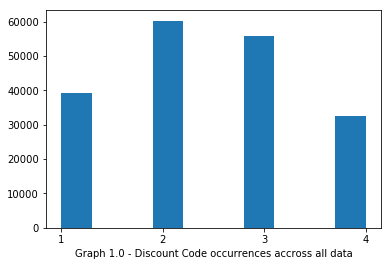

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axes().set_xticks([1,2,3,4])
plt.hist(df['Discount Code'])
plt.xlabel('Graph 1.0 - Discount Code occurrences accross all data')

<blockquote>
    <h4>Discount code distribution accross our data</h4>
    <p>We can see from graph 1.0 that the discount codes are unbalanced accross our data, therefore it could cause an error to some of our conclusions about the data.</p>
</blockquote>

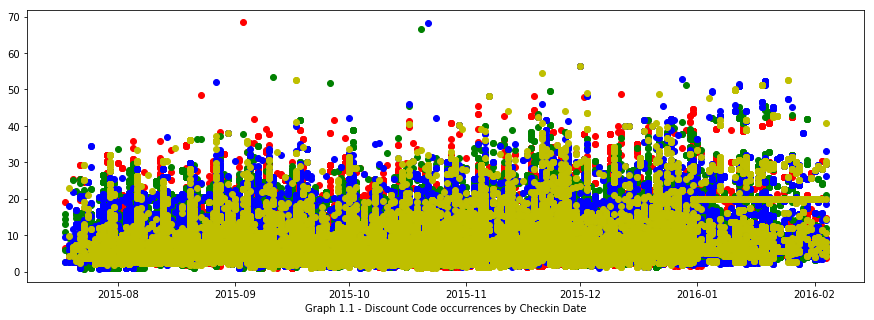

In [0]:
plt.rcParams['figure.figsize'] = [15,5]
plt.plot_date(df[df['Discount Code']==1]['Checkin Date'],df[df['Discount Code']==1]['Discount Perc'],color='r')
plt.plot_date(df[df['Discount Code']==2]['Checkin Date'],df[df['Discount Code']==2]['Discount Perc'],color='g')
plt.plot_date(df[df['Discount Code']==3]['Checkin Date'],df[df['Discount Code']==3]['Discount Perc'],color='b')
plt.plot_date(df[df['Discount Code']==4]['Checkin Date'],df[df['Discount Code']==4]['Discount Perc'],color='y')
plt.xlabel('Graph 1.1 - Discount Code occurrences by Checkin Date')

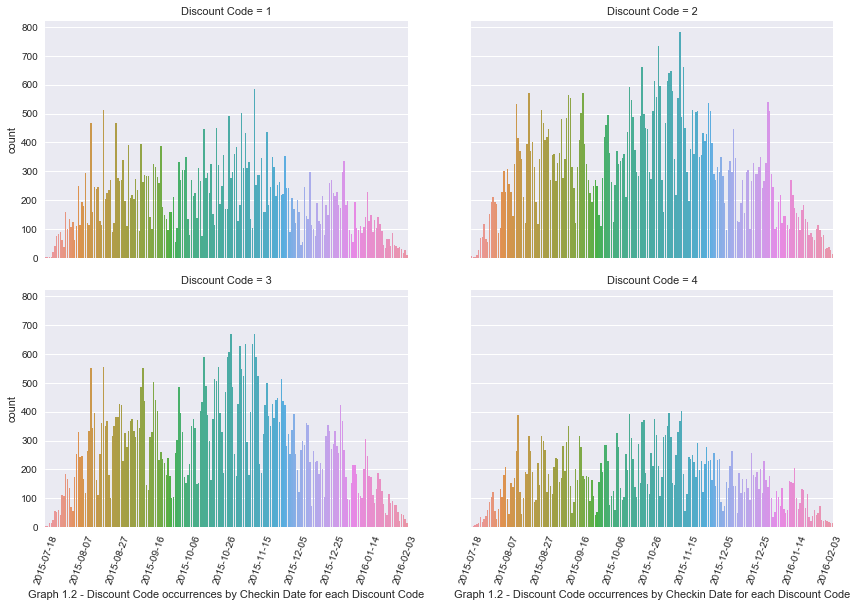

In [0]:
import seaborn as sns
df = df.sort_values(by = 'Checkin Date')
g =sns.factorplot('Checkin Date',data=df,kind='count',col='Discount Code',aspect = 1.5,col_wrap=2)
g.set_xticklabels(rotation=70,step=20)
g.set_xlabels('Graph 1.2 - Discount Code occurrences by Checkin Date for each Discount Code')

<blockquote>
    <h4>Discount code distiribution by the checkin date</h4>
    <p>We can see from graphs 1.1 and 1.2 that our discount codes are evenly distributed by the checkin date.</p>
    <p>We can also see from graph 1.2 that our discount codes amounts were in growth arround 10/15 to 12/15 simultaneously, which means more discounts were given arround those dates.</p>
</blockquote>

### Checking the Dates distribution

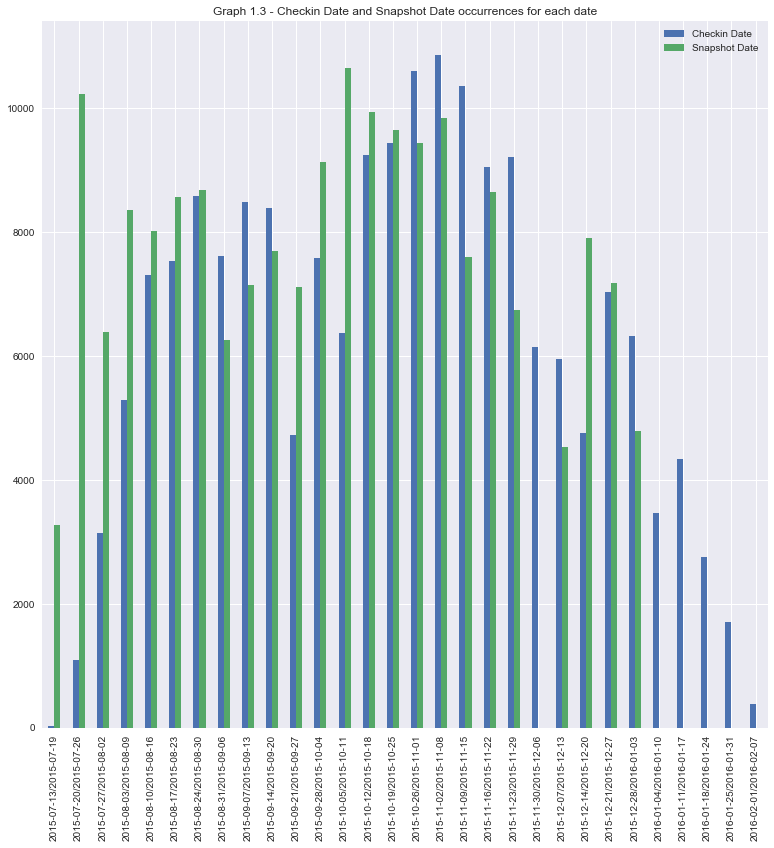

In [0]:
s = pd.to_datetime(pd.Series(df['Checkin Date']), format='%Y-%m-%d')
s.index = s.dt.to_period('w')
s = s.groupby(level=0).size()
s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='w'), fill_value=0)

t = pd.to_datetime(pd.Series(df['Snapshot Date']), format='%Y-%m-%d')
t.index = t.dt.to_period('w')
t = t.groupby(level=0).size()
t = t.reindex(pd.period_range(t.index.min(), t.index.max(), freq='w'), fill_value=0)

pd.concat({
    'Snapshot Date': t, 'Checkin Date': s
}, axis=1).plot.bar(figsize=(13,13),title='Graph 1.3 - Checkin Date and Snapshot Date occurrences for each date')

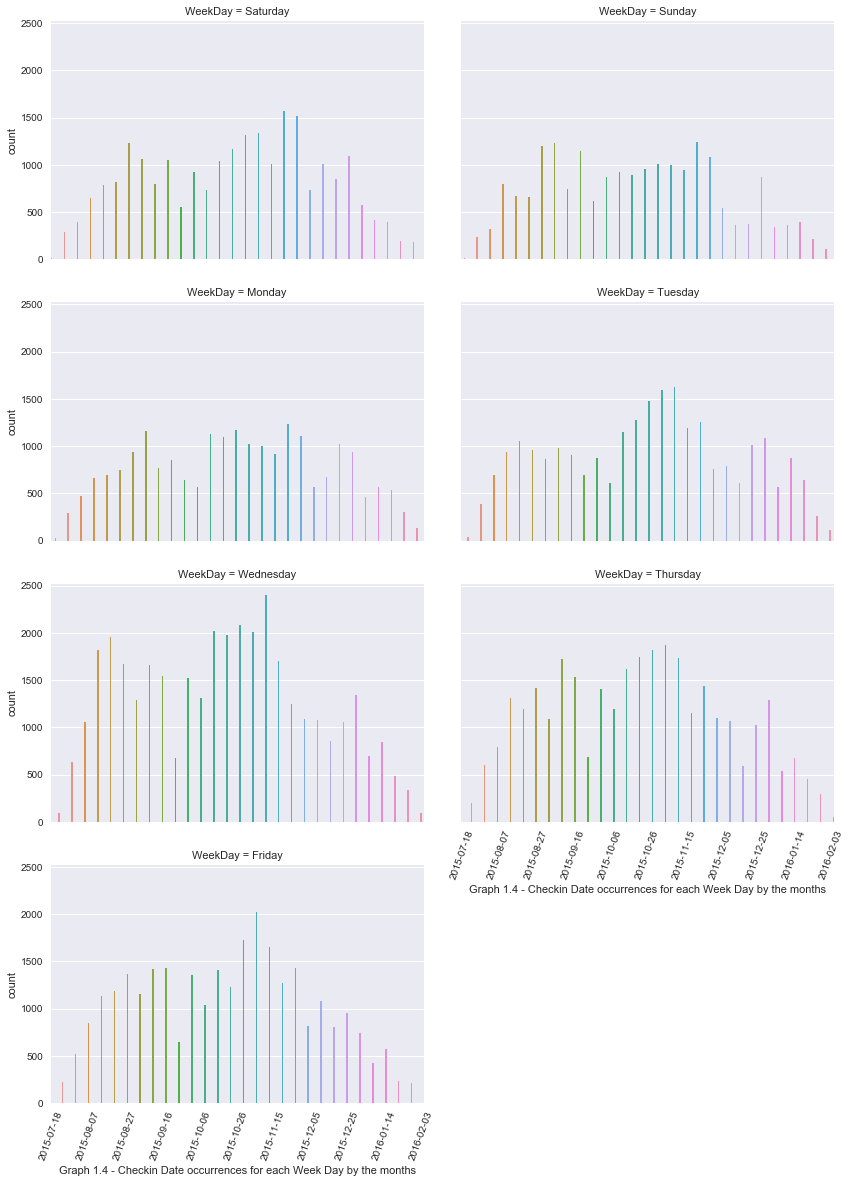

In [0]:
g =sns.factorplot('Checkin Date',data=df,kind='count',col='WeekDay',aspect = 1.5,col_wrap=2)
g.set_xticklabels(rotation=70,step=20)
g.set_xlabels('Graph 1.4 - Checkin Date occurrences for each Week Day by the months')

<blockquote>
    <h4>Checkin Date distiribution by Week day column</h4>
    <p>We can learn from graph 1.4 that there were significantly more invitations in the middle of the week, much more then the end of the week by amount.</p>
</blockquote>

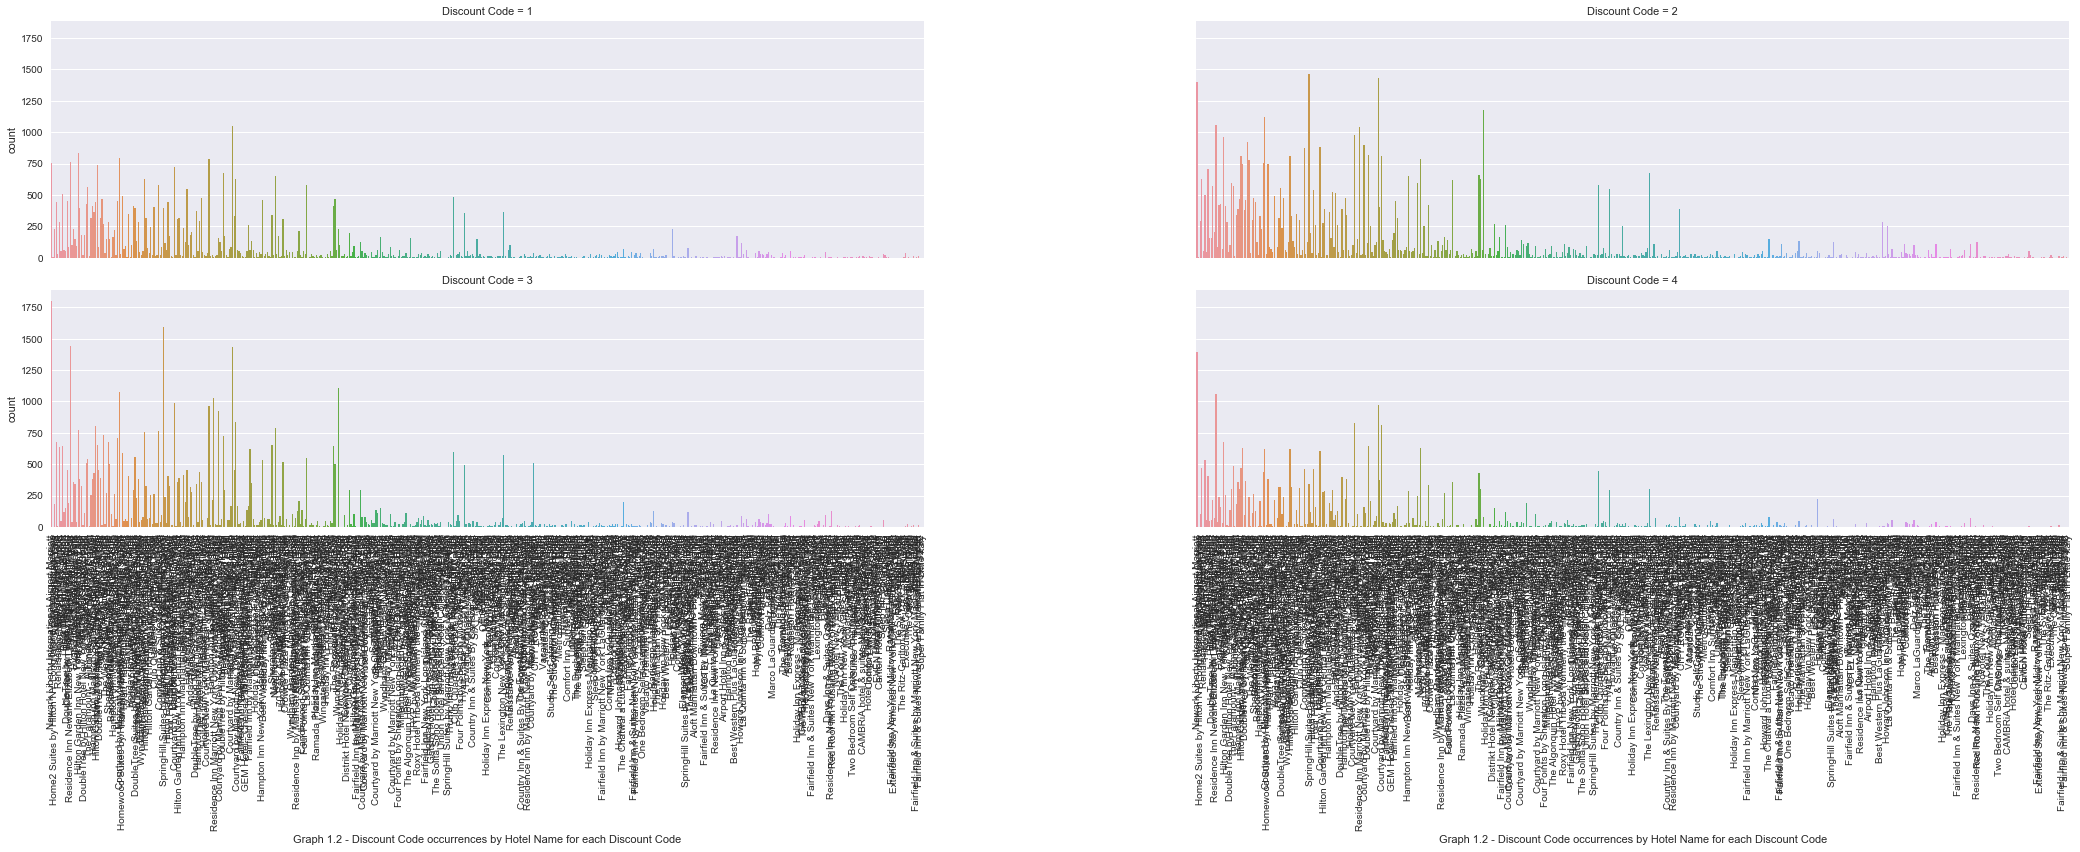

In [0]:
g =sns.factorplot('Hotel Name',data=df,kind='count',col='Discount Code',aspect = 4,col_wrap=2)
g.set_xticklabels(rotation=90)
g.set_xlabels('Graph 1.2 - Discount Code occurrences by Hotel Name for each Discount Code')

## Transforming the data params

In [0]:
import calendar
import numpy as np

# nornalize WeekDay monday-sanday [0,6]
listDays=list(calendar.day_name)
DaysMap=dict(zip(listDays,range(len(listDays))))
df['WeekDay']=df['WeekDay'].map(DaysMap)
print(DaysMap)

df.head()

{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


,Snapshot Date,Checkin Date,Discount Price,Discount Code,Hotel Name,Day Diff,WeekDay,Discount Diff,Discount Perc
65,2015-07-17,2015-07-18,1275,1,Newark Liberty International Airport Marriott,1,5,90,6.593407
365,2015-07-17,2015-07-18,515,2,Howard Johnson Inn Queens,1,5,33,6.021898
349,2015-07-17,2015-07-18,1245,2,Home2 Suites by Hilton NY Long Island City Man...,1,5,150,10.752688
262,2015-07-17,2015-07-18,3600,2,Park Hyatt New York,1,5,100,2.702703
359,2015-07-17,2015-07-18,667,2,Ramada Staten Island,1,5,113,14.487179


### Running sns pairplot in order to check redundant columns

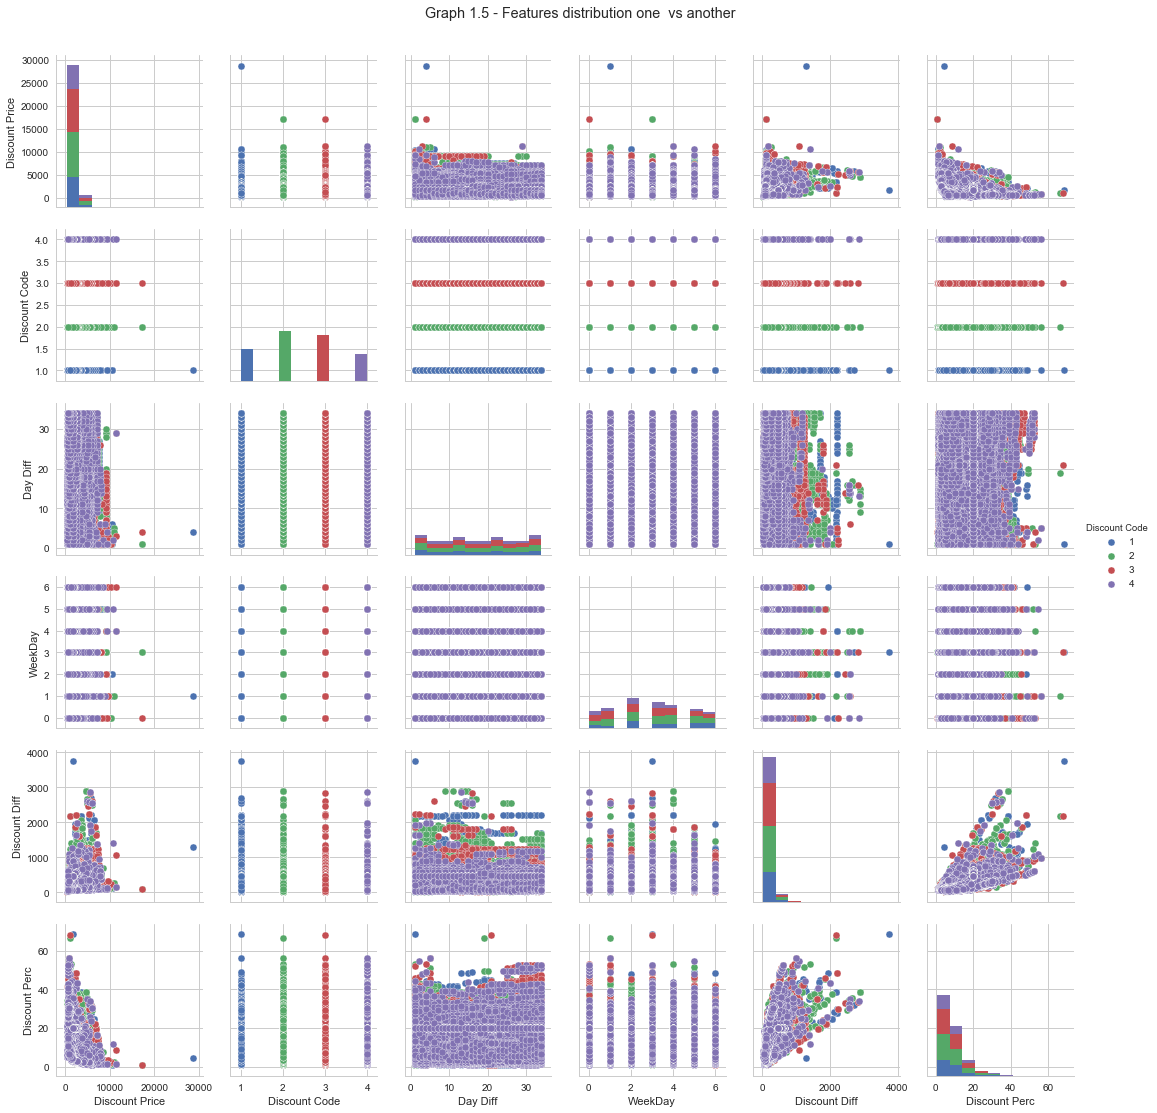

In [0]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)

sns.set_style('whitegrid')
plotter = sns.pairplot(df,hue='Discount Code')
plotter.fig.suptitle('Graph 1.5 - Features distribution one  vs another', y=1.03)

<blockquote>
    <h4>Conclusions from the features distributions</h4>
    <p>As we can see in graph 1.5 - features distribution graphs, we can not see a significant relation between one feature to another from first look,</p>
    <p>However there is a suspicion for a certain relation between Discount Diff and Discount Perc features.</p>
</blockquote>

### Checking Discount Diff vs Discount Perc relations

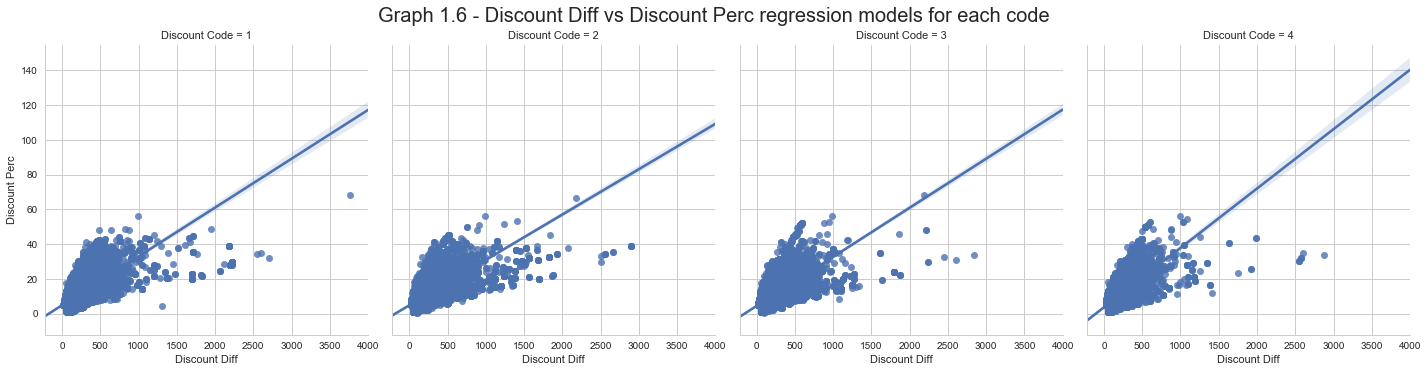

In [0]:
plotter = sns.lmplot(data=df,x='Discount Diff',y='Discount Perc',col='Discount Code')
plotter.fig.suptitle('Graph 1.6 - Discount Diff vs Discount Perc regression models for each code',fontsize=20, y=1.03)

In [0]:
Y=df['Discount Perc']
X=np.vstack(df['Discount Diff'])
X=np.array([[value,1] for value in X],dtype='float')
m,b = np.linalg.lstsq(X,Y)[0]
m,b

(0.028277292420618418, 4.5634525522611336)

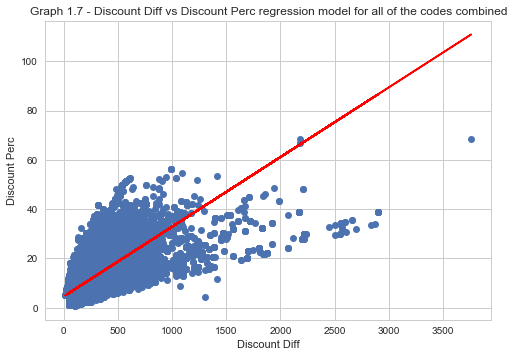

In [0]:
plt.plot(df['Discount Diff'],df['Discount Perc'],'o')
x=df['Discount Diff']
plt.plot(x,x*m+b,'r')
plt.title('Graph 1.7 - Discount Diff vs Discount Perc regression model for all of the codes combined')
plt.xlabel('Discount Diff')
plt.ylabel('Discount Perc')

In [0]:
result=np.linalg.lstsq(X,Y)
error_total=result[1]
rmse=np.sqrt(error_total/len(X))
print('The RMSE Of Our Model Is %.3f (By percentage)'%rmse)

The RMSE Of Our Model Is 4.465 (By percentage)


<blockquote>
    <h4>Conclusions about the relation between discount percent and discount diff</h4>
    <p>The conclusions about the following relation is that it exists, first of all you can reffer to graphs 1.6 and 1.7 and see an almost clear regression relation between the two features.</p>
    <p>Moreover you can notice from graph 1.6 that there is such a connection for each of the different codes.</p>
    <p>In conclusion we can learn that it doesn't metter which feature we predict by, discount diff or perc, because of the linear connection between those features and the slight difference between them as you can see from the RMSE too.</p>
</blockquote>

### Normalizing the data

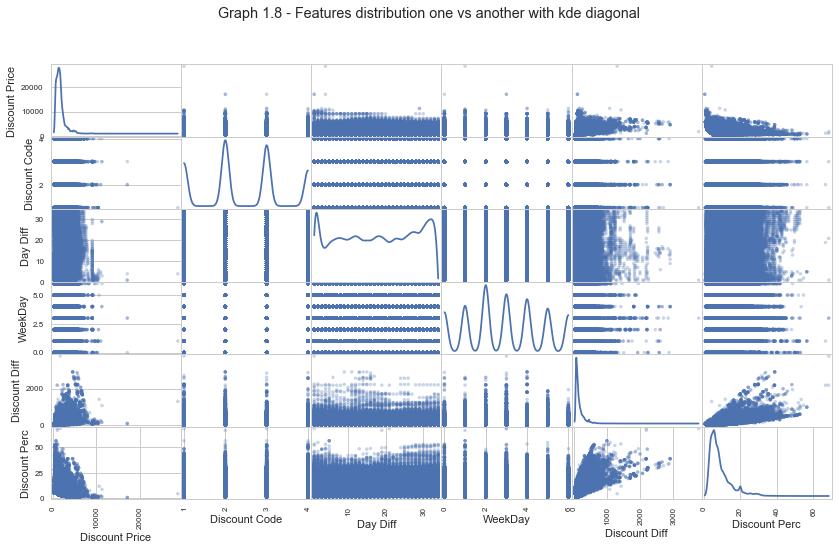

In [0]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

pd.scatter_matrix(df,alpha=0.3,figsize=(14,8),diagonal='kde')
plt.suptitle('Graph 1.8 - Features distribution one vs another with kde diagonal')
plt.show()

<blockquote>
    <h4>First conclusions about the data normality</h4>
    <p>We can learn from graph 1.8 that the relevant continuous features, Day Diff, Discount Diff and Discount Perc,
    are not normalized while the rest of the features are just not continuous.</p>
</blockquote>

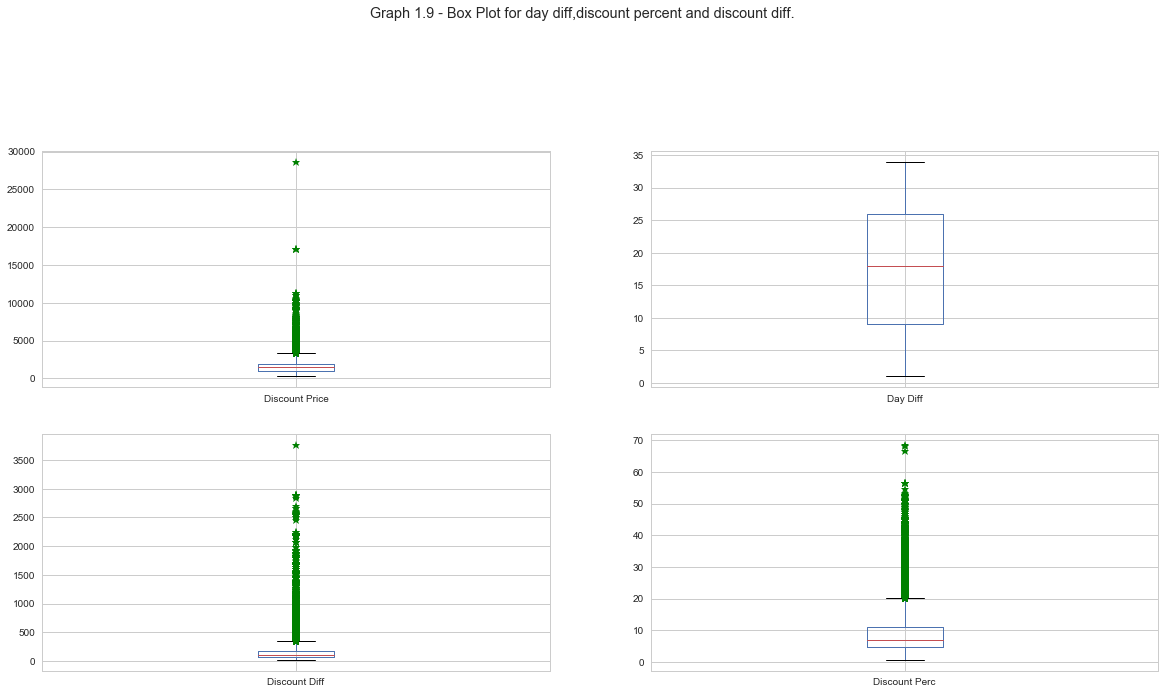

In [0]:
x=df.drop(['Discount Code','Snapshot Date','Hotel Name','WeekDay'], axis=1)
flierprops=dict(marker='*',markerfacecolor='green',markersize=9,linestyle='none')
x.plot(kind='box', subplots=True,flierprops=flierprops, layout=(4,2), sharex=False, sharey=False, figsize=(20,20), title='Graph 1.9 - Box Plot for day diff,discount percent and discount diff.')
plt.show()

In [0]:
disdata = [[x for x in df['Discount Diff'] if x>330],[ x for x in df['Discount Perc'] if x>20]]
print('Discount diff real and suspected outliers amount - ',len(disdata[0]) ,'\n\nDiscount Perc real and suspected outliers amount - ' , len(disdata[1]))

Discount diff real and suspected outliers amount -  15752 

Discount Perc real and suspected outliers amount -  10923


In [0]:
import pylab
import scipy
import scipy.stats as stats
#from scipy.stats import norm
#from sklearn import preprocessing

test_df=df.copy()
test_df['Discount Perc']=np.log(test_df['Discount Perc'])
test_df['Discount Diff']=np.log(test_df['Discount Diff'])
test_df['Discount Price']=np.log(test_df['Discount Price'])

In [0]:
def mufunc (X,label):
    groups = X.groupby(by=label).size()
    sumi = 0
    for i,d in groups.iteritems():
        sumi=sumi+(d*i/len(X))
    return sumi

def sigmfunc(X,label):
    mean = np.mean(X[label])
    sumi=0
    for i in X[label]:
        sumi=sumi+(np.power(i-mean,2))
    sumi=np.sqrt(sumi/len(X))
    return sumi

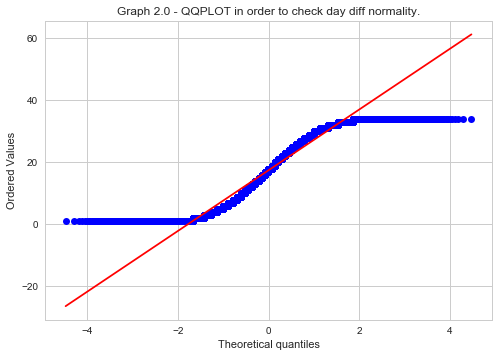

In [0]:
stats.probplot(test_df['Day Diff'],dist='norm',plot=pylab)
pylab.title('Graph 2.0 - QQPLOT in order to check day diff normality.')
pylab.show()

<blockquote>
    <h4>About the data outliers</h4>
    <p>We can see in graph 1.9 that there is 15752 real and suspected outliers for discount diff and 10923 for discount perc that we need to clean and modify.</p>
    <p>We can also see in graph 2.0 ,QQPlot of the day diff , that the day diff is not normal, but even points on a unified distribution, we suspect it is because it is discrete and can't be normalized due to he's discreteness.</p>
</blockquote>

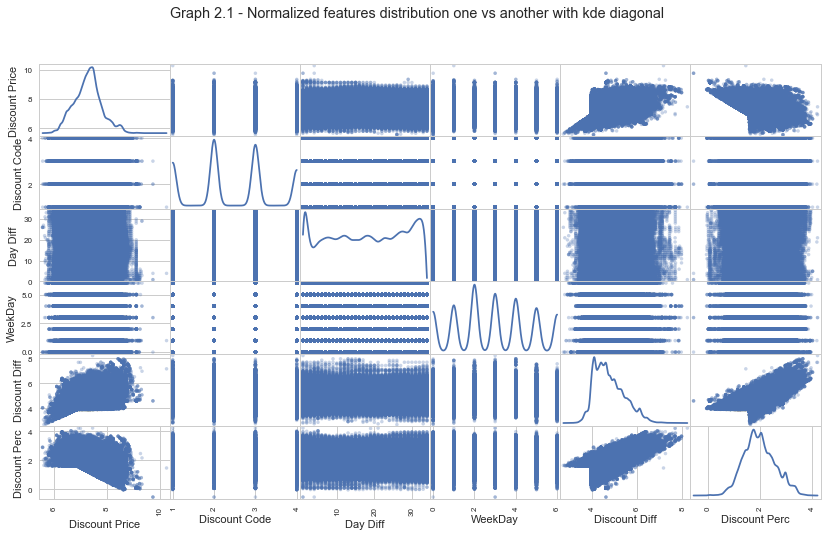

In [0]:
pd.scatter_matrix(test_df,alpha=0.3,figsize=(14,8),diagonal='kde')
plt.suptitle('Graph 2.1 - Normalized features distribution one vs another with kde diagonal')
plt.show()

### Cleaning the Outliers

In [0]:
all_outliers = np.array([],dtype='int64')
for feature in test_df.drop(['Snapshot Date','Checkin Date','Discount Code','Hotel Name','WeekDay','Day Diff'],axis=1).keys():
    Q1=np.percentile(test_df[feature],25)
    Q3=np.percentile(test_df[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts=test_df[~((test_df[feature]>=Q1-step) & (test_df[feature]<=Q3+step))]
    all_outliers=np.append(all_outliers,outlier_pts.index.values.astype('int64'))
    #display(outlier_pts)
all_outliers,indices = np.unique(all_outliers,return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>0]
good_data=test_df.drop(test_df.index[outliers]).reset_index(drop=True)
good_data.describe()

,Discount Price,Discount Code,Day Diff,WeekDay,Discount Diff,Discount Perc
count,183485.000000,183485.000000,183485.000000,183485.000000,183485.000000,183485.000000
mean,7.282917,2.434482,17.464703,2.915944,4.769176,1.995998
std,0.518688,1.005283,10.041932,1.839661,0.669743,0.602584
min,5.560682,1.000000,1.000000,0.000000,2.708050,-0.542324
25%,6.941190,2.000000,9.000000,1.000000,4.248495,1.578666
50%,7.296413,2.000000,18.000000,3.000000,4.634729,1.953922
75%,7.581720,3.000000,26.000000,4.000000,5.192957,2.392631
max,10.263781,4.000000,34.000000,6.000000,8.232174,4.225751


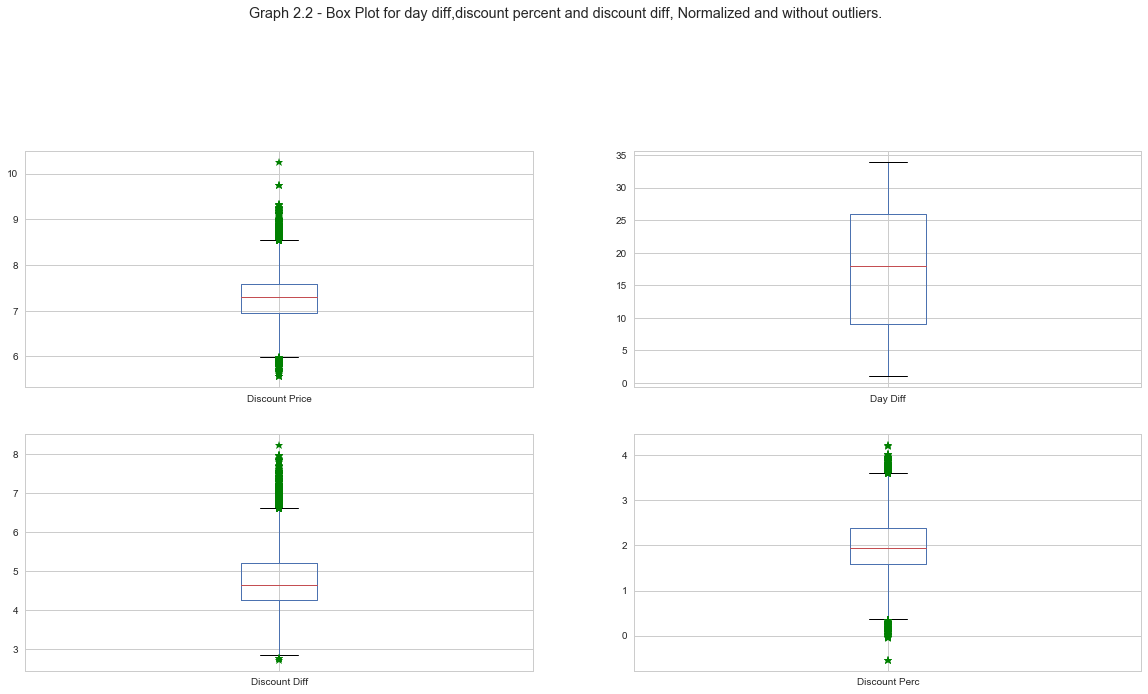

In [0]:
x=good_data.drop(['Discount Code','Snapshot Date','Hotel Name','WeekDay'], axis=1)
flierprops=dict(marker='*',markerfacecolor='green',markersize=9,linestyle='none')
x.plot(kind='box', subplots=True,flierprops=flierprops, layout=(4,2), sharex=False, sharey=False, figsize=(20,20), title='Graph 2.2 - Box Plot for day diff,discount percent and discount diff, Normalized and without outliers.')
plt.show()

<blockquote>
    <h4>Conclusions about the outliers</h4>
    <p>We found and dropped from our normal data 1989 clear outliers overall.</p>
</blockquote>

### Saving the transformed data to a csv

In [0]:
good_data.to_csv('Hotels_Good_Data.csv',encoding='UTF-8')